# Сычева Дарья, РИМ-181226

# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [47]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [48]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

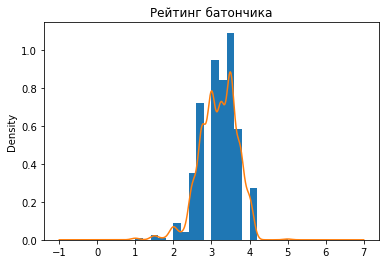

In [49]:
rating = best_bar['rate']
rating.plot(kind='hist', bins=20, density=True)
rating.plot(kind='kde', title='Рейтинг батончика')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится.

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

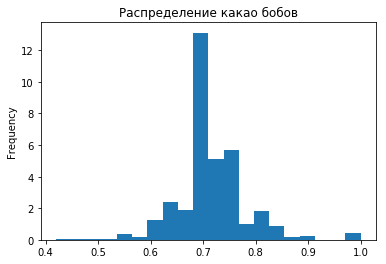

In [50]:
def toFloat(str):
    return float(str.strip('%'))/100

best_bar['percent'] = best_bar['percent'].apply(toFloat)

best_bar['percent'].plot(kind='hist', bins=20, density=True, title='Распределение какао бобов')

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

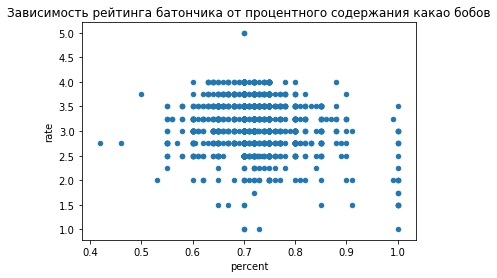

In [51]:
barDependence = pd.concat([cocoaBeans, rating], axis=1)
barDependence.plot(kind='scatter', x='percent', y='rate', title='Зависимость рейтинга батончика от процентного содержания какао бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

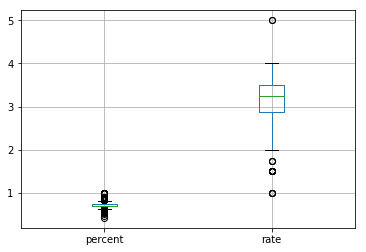

In [52]:
barDependence.boxplot()

In [53]:
barDependence.describe()

,percent,rate
count,1795.000000,1795.000000
mean,0.716983,3.185933
std,0.063231,0.478062
min,0.420000,1.000000
25%,0.700000,2.875000
50%,0.700000,3.250000
75%,0.750000,3.500000
max,1.000000,5.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [54]:
location = best_bar['company_loc']
locCount = location.value_counts()
lCount = len(locCount)
print('location count', lCount)

location count 60


In [55]:
orig = best_bar['bean_orig']
origCount = orig.value_counts()
orCount = len(origCount)
print('origins count', orCount)

origins count 100


После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

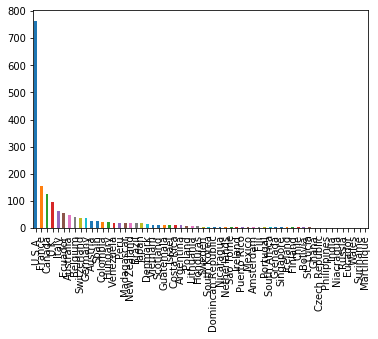

In [56]:
locCount.plot(kind='bar')

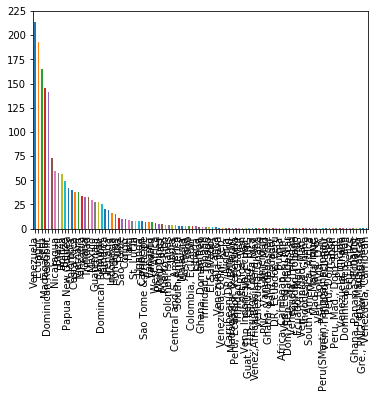

In [57]:
origCount.plot(kind='bar')

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [58]:
dropObjects = best_bar.dropna()
dropObjects

,company_loc,rate,percent,bean_orig
0,France,3.75,0.63,Sao Tome
1,France,2.75,0.70,Togo
2,France,3.00,0.70,Togo
3,France,3.50,0.70,Togo
4,France,3.50,0.70,Peru
5,France,2.75,0.70,Venezuela
6,France,3.50,0.70,Cuba
7,France,3.50,0.70,Venezuela
8,France,3.75,0.70,Venezuela
9,France,4.00,0.70,Peru


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [59]:
dropObjects['bean_orig'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [60]:
excludeItem = dropObjects['bean_orig'] != '\xa0'

excludeEmpty = dropObjects[excludeItem]

excludeEmpty

,company_loc,rate,percent,bean_orig
0,France,3.75,0.63,Sao Tome
1,France,2.75,0.70,Togo
2,France,3.00,0.70,Togo
3,France,3.50,0.70,Togo
4,France,3.50,0.70,Peru
5,France,2.75,0.70,Venezuela
6,France,3.50,0.70,Cuba
7,France,3.50,0.70,Venezuela
8,France,3.75,0.70,Venezuela
9,France,4.00,0.70,Peru


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [61]:
rare = excludeEmpty['bean_orig'].value_counts() <= 5

def neededObj(bar):
    return rare[bar]

needToApply = excludeEmpty['bean_orig'].apply(neededObj)
newList = excludeEmpty['bean_orig'].mask(needToApply, 'complex')

excludeEmpty.assign(bean_orig=newList)

,company_loc,rate,percent,bean_orig
0,France,3.75,0.63,Sao Tome
1,France,2.75,0.70,complex
2,France,3.00,0.70,complex
3,France,3.50,0.70,complex
4,France,3.50,0.70,Peru
5,France,2.75,0.70,Venezuela
6,France,3.50,0.70,Cuba
7,France,3.50,0.70,Venezuela
8,France,3.75,0.70,Venezuela
9,France,4.00,0.70,Peru


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

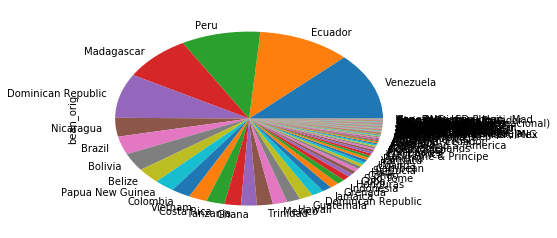

In [62]:
excludeEmpty['bean_orig'].value_counts().plot.pie()

## Попарные графики распределений

In [63]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

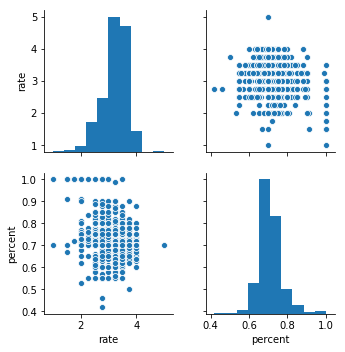

In [64]:
pairplot(excludeEmpty)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [65]:
avg = excludeEmpty.groupby(['bean_orig']).mean()
avg.sort_values(by='rate', ascending=False).head(3)

,rate,percent
bean_orig,,
"Dom. Rep., Madagascar",4.0,0.7
"Ven, Bolivia, D.R.",4.0,0.7
"Gre., PNG, Haw., Haiti, Mad",4.0,0.7


In [66]:
avg = excludeEmpty.groupby(['bean_orig']).median()
avg.sort_values(by='rate', ascending=False).head(3)

,rate,percent
bean_orig,,
"Peru, Dom. Rep",4.0,0.67
"Dom. Rep., Madagascar",4.0,0.70
"Ven, Bolivia, D.R.",4.0,0.70
